In [1]:
import torch
import sys
sys.path.insert(0, '/gpfs/home/kn2347/DARTS')
from DARTS import Segmentation
from DARTS.models.dense_unet_model import Down_sample
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import pandas as pd

In [2]:
sys.path

['/gpfs/home/kn2347/DARTS',
 '/gpfs/home/kn2347/test',
 '/gpfs/home/kn2347/.conda/envs/myclone/lib/python39.zip',
 '/gpfs/home/kn2347/.conda/envs/myclone/lib/python3.9',
 '/gpfs/home/kn2347/.conda/envs/myclone/lib/python3.9/lib-dynload',
 '',
 '/gpfs/home/kn2347/.conda/envs/myclone/lib/python3.9/site-packages']

In [ ]:
model_checkpoint_path = '/gpfs/data/luilab/karthik/pediatric_seg_proj/model_chkpts/dense_unet_left2right_finetuned.pth'
seg_obj = Segmentation(model_wts_path = model_checkpoint_path, model_type="dense-unet")
seg_out, seg_proba_out = seg_obj.predict(inputs = '/gpfs/data/cbi/hcp/hcp_seg/data_orig/100206/mri/orig/001.mgz')

In [ ]:
model_checkpoint_path = '/gpfs/data/luilab/karthik/pediatric_seg_proj/model_chkpts/dense_unet_back2front_non_finetuned.pth'
seg_obj = Segmentation(model_wts_path = model_checkpoint_path, model_type="dense-unet")
seg_out, seg_proba_out = seg_obj.predict(inputs = '/gpfs/data/cbi/hcp/hcp_seg/data_orig/199251/mri/orig/001.mgz')

In [12]:
print(seg_out.shape)
print(seg_proba_out.shape)

(182, 163, 182)
(66, 217, 182, 182)


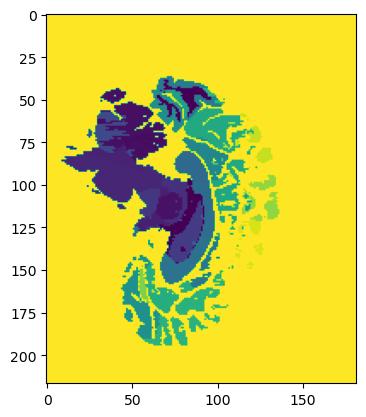

In [3]:
asdf = nib.freesurfer.MGHImage.from_filename('/gpfs/home/kn2347/results/test_segmentations/199251_seg.mgz').get_fdata()
plt.imshow(asdf[91,:,:])

(256, 256, 256)


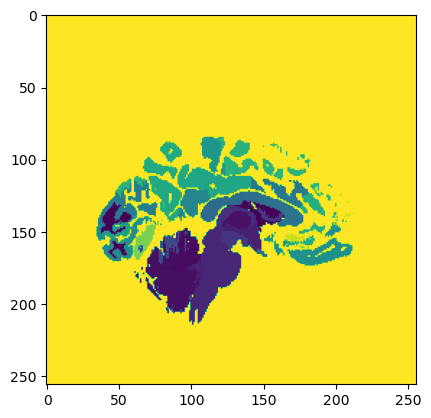

In [3]:
asdf_no_transf = nib.freesurfer.MGHImage.from_filename('/gpfs/home/kn2347/results/test_segmentations/199251_no_revert_seg.mgz').get_fdata()
plt.imshow(asdf_no_transf[128,:,:])

print(asdf_no_transf.shape)

(256, 256, 256)


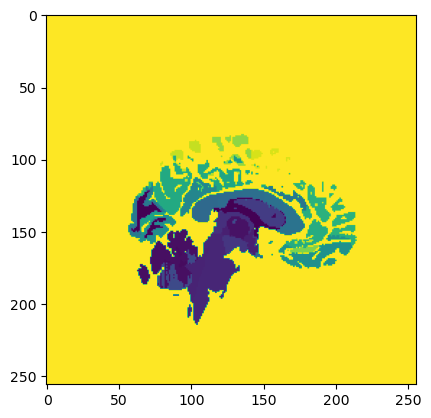

In [7]:
asdf_reduced = nib.freesurfer.MGHImage.from_filename('/gpfs/home/kn2347/results/test_segmentations/199251_reduced_seg.mgz').get_fdata()
plt.imshow(asdf_reduced[128,:,:])

print(asdf_reduced.shape)

(256, 256, 256)


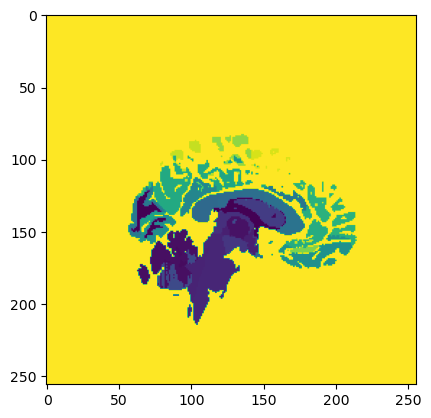

In [12]:
asdf_somewhat_proc = nib.freesurfer.MGHImage.from_filename('/gpfs/home/kn2347/results/test_segmentations/199251_somewhat_proc_seg.mgz').get_fdata()
plt.imshow(asdf_somewhat_proc[128,:,:])

print(asdf_somewhat_proc.shape)

(1, 256, 256)


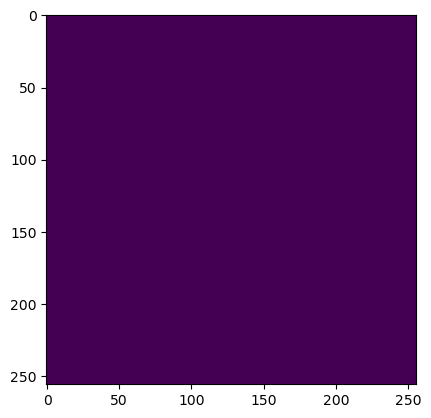

In [9]:
asdf_btf_128 = nib.freesurfer.MGHImage.from_filename('/gpfs/home/kn2347/results/test_segmentations/199251_btf_128_seg.mgz').get_fdata()
plt.imshow(asdf_btf_128[0,:,:])

print(asdf_btf_128.shape)

In [13]:
data_orig_mri = nib.load('/gpfs/data/cbi/hcp/hcp_seg/data_orig/199251/mri/orig/001.mgz').get_fdata()
data_sp_mri = nib.load('/gpfs/data/cbi/hcp/hcp_seg/data_orig/199251/mri/T1.mgz').get_fdata()

print(data_orig_mri.shape)
print(data_sp_mri.shape)

(182, 217, 182)
(256, 256, 256)


In [15]:
eps = 10**-7
data_orig_mri_condensed = np.where(np.absolute(data_orig_mri) < eps, np.nan, data_orig_mri)
data_sp_mri_condensed = np.where(np.absolute(data_sp_mri) < eps, np.nan, data_sp_mri)

In [16]:
print(pd.Series(data_orig_mri_condensed.flatten()).describe())
print(pd.Series(data_sp_mri_condensed.flatten()).describe())

#print(np.nanmean(data_orig_mri_condensed))
#print(np.nanmean(data_reduced_mri_condensed))

count    7.077364e+06
mean     5.306922e+01
std      7.140775e+01
min      1.000104e-07
25%      3.662803e+00
50%      6.802382e+00
75%      1.043378e+02
max      6.170959e+02
dtype: float64
count    2.863641e+06
mean     6.425621e+01
std      3.433744e+01
min      1.000000e+00
25%      3.700000e+01
50%      6.800000e+01
75%      9.100000e+01
max      1.810000e+02
dtype: float64


In [2]:
import pickle

In [3]:
# open a file, where you stored the pickled data
file = open('/gpfs/data/cbi/hcp/hcp_seg/brain_segmentation/train_sub_index_aparc', 'rb')

# dump information to that file
data = pickle.load(file)

'/gpfs/data/cbi/hcp/hcp_seg/brain_segmentation/train_sub_index_aparc'

'/gpfs/data/cbi/hcp/hcp_seg/brain_segmentation/train_sub_index_aparc'